In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
def henon_scalar(a,b,xpt):
    xn = a + b*xpt[1] - xpt[0]**2
    yn = xpt[0]
    return np.array([xn,yn])

def henon_attractor_maker(niter):
    xpt = np.array([.1,.1])
    ptlst = np.zeros((1,2))
    for jj in xrange(0,niter):
        xpt = henon_scalar(1.2,.4,xpt)
        lpt = np.zeros((1,2))
        lpt[0,:] = xpt
        ptlst = np.append(ptlst,lpt,axis=0)
    return ptlst

In [144]:
def box_plot(xl,xr,yb,yt):
    plt.plot([xl,xr],[yb,yb],color='k')
    plt.plot([xl,xr],[yt,yt],color='k')
    plt.plot([xl,xl],[yb,yt],color='k')
    plt.plot([xr,xr],[yb,yt],color='k')

In [147]:
def box_cutter(pts,bscl,xl,xr,yb,yt):
    
    xmin,xmax = xl,xr
    ymin,ymax = yb,yt
    
    dx = (xmax-xmin)/2.
    dy = (ymax-ymin)/2.
    
    if pts.size > 2 and np.amin([dx,dy]) > bscl:
        
        xpts = pts[:,0]
        ypts = pts[:,1]
        npts = xpts.size
        nvals = range(0,npts)    
    
        xindl = xpts < xmin + dx
        xindr = xpts >= xmin + dx
        yindt = ypts >= ymin + dy
        yindb = ypts < ymin + dy
    
        qtr = xindr*yindt
        qbr = xindr*yindb
        qbl = xindl*yindb
        qtl = xindl*yindt
    
        if np.amin(np.array([dx,dy])) > bscl:
            dtr,dbr,dbl,dtl = 0,0,0,0
        
            if np.sum(qtr) > 0:
                inds = np.squeeze(np.nonzero(np.array(nvals*qtr)))
                dtr = box_cutter(pts[inds,:],bscl,xmin+dx,xmax,ymin+dy,ymax)
                box_plot(xmin+dx,xmax,ymin+dy,ymax)
            if np.sum(qbr) > 0:
                inds = np.squeeze(np.nonzero(np.array(nvals*qbr)))
                dbr = box_cutter(pts[inds,:],bscl,xmin+dx,xmax,ymin,ymin+dy)
                box_plot(xmin+dx,xmax,ymin,ymin+dy)
            if np.sum(qbl) > 0:
                inds = np.squeeze(np.nonzero(np.array(nvals*qbl)))
                dbl = box_cutter(pts[inds,:],bscl,xmin,xmin+dx,ymin,ymin+dy)
                box_plot(xmin,xmin+dx,ymin,ymin+dy)
            if np.sum(qtl) > 0:
                inds = np.squeeze(np.nonzero(np.array(nvals*qtl)))
                dtl = box_cutter(pts[inds,:],bscl,xmin,xmin+dx,ymin+dy,ymax)
                box_plot(xmin,xmin+dx,ymin+dy,ymax)
    
            return dtr+dbr+dbl+dtl
    
    else:
        if pts.size > 2:
            xpts = pts[:,0]
            ypts = pts[:,1]
        elif pts.size==2:
            xpts = pts[0]
            ypts = pts[1]
        else:
            return 0
        xindl = xpts < xmin + dx
        xindr = xpts >= xmin + dx
        yindt = ypts >= ymin + dy
        yindb = ypts < ymin + dy
    
        qtr = xindr*yindt
        qbr = xindr*yindb
        qbl = xindl*yindb
        qtl = xindl*yindt
        
        dcnt = 0
        if np.sum(qtr) > 0:
            dcnt += 1
        if np.sum(qbr) > 0:
            dcnt +=1
        if np.sum(qbl) > 0:
            dcnt +=1
        if np.sum(qtl) > 0:
            dcnt +=1
        return dcnt

In [148]:
def box_counter(pts,bscl):
    xpts = pts[:,0]
    ypts = pts[:,1]
    npts = xpts.size
    
    xmin = np.amin(xpts)-.001
    xmax = np.amax(xpts)+.001
    ymin = np.amin(ypts)-.001
    ymax = np.amax(ypts)+.001
    
    dx = (xmax-xmin)/2.
    dy = (ymax-ymin)/2.
    
    xindl = xpts < xmin + dx
    xindr = xpts >= xmin + dx
    yindt = ypts >= ymin + dy
    yindb = ypts < ymin + dy
    
    qtr = xindr*yindt
    qbr = xindr*yindb
    qbl = xindl*yindb
    qtl = xindl*yindt
    dtr,dbr,dbl,dtl = 0,0,0,0
    nvals = range(0,npts)    
    
    if np.sum(qtr) > 0:
        inds = np.squeeze(np.nonzero(np.array(nvals*qtr)))
        dtr = box_cutter(pts[inds,:],bscl,xmin+dx,xmax,ymin+dy,ymax)
        box_plot(xmin+dx,xmax,ymin+dy,ymax)
    if np.sum(qbr) > 0:
        inds = np.squeeze(np.nonzero(np.array(nvals*qbr)))
        dbr = box_cutter(pts[inds,:],bscl,xmin+dx,xmax,ymin,ymin+dy)
        box_plot(xmin+dx,xmax,ymin,ymin+dy)
    if np.sum(qbl) > 0:
        inds = np.squeeze(np.nonzero(np.array(nvals*qbl)))
        dbl = box_cutter(pts[inds,:],bscl,xmin,xmin+dx,ymin,ymin+dy)
        box_plot(xmin,xmin+dx,ymin,ymin+dy)
    if np.sum(qtl) > 0:
        inds = np.squeeze(np.nonzero(np.array(nvals*qtl)))
        dtl = box_cutter(pts[inds,:],bscl,xmin,xmin+dx,ymin+dy,ymax)
        box_plot(xmin,xmin+dx,ymin+dy,ymax)
        
    return np.log(dtr+dbr+dbl+dtl)/np.log(1./bscl)

1.8746748803


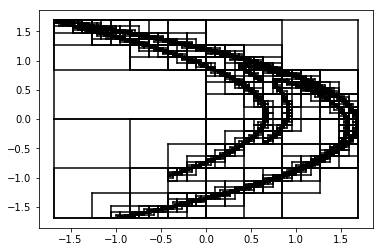

In [151]:
pts = henon_attractor_maker(int(1e5))
dim = box_counter(pts[int(1e2):,:],1e-2)
print dim